In [1]:
import torch
x=torch.rand(5,3)
x

tensor([[0.4365, 0.0318, 0.6411],
        [0.7794, 0.6360, 0.1504],
        [0.7253, 0.4654, 0.3611],
        [0.5816, 0.3748, 0.0471],
        [0.3962, 0.3280, 0.9735]])

In [2]:
y=torch.ones(5,3)
y

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [3]:
# pytorh矩阵叉乘法 mm() ,转置t()
q=x.mm(y.t())
q

tensor([[1.1094, 1.1094, 1.1094, 1.1094, 1.1094],
        [1.5657, 1.5657, 1.5657, 1.5657, 1.5657],
        [1.5518, 1.5518, 1.5518, 1.5518, 1.5518],
        [1.0035, 1.0035, 1.0035, 1.0035, 1.0035],
        [1.6978, 1.6978, 1.6978, 1.6978, 1.6978]])

In [4]:
# pytorh张量与Numpy数组之间的转换
import numpy as np
x_tensor=torch.randn(2,3)
y_numpy=np.random.randn(2,3)
# 将张量转换为numpy
x_numpy=x_tensor.numpy()
# 将numpy转化为张量
y_tensor=torch.from_numpy(y_numpy)
print(x_tensor)
print(x_numpy)
print(y_numpy)
print(y_tensor)

tensor([[ 0.1676,  0.1150,  0.4973],
        [ 1.3520, -1.0198, -1.2168]])
[[ 0.16757819  0.11504743  0.49726704]
 [ 1.3520088  -1.0197656  -1.2167945 ]]
[[ 1.25899992  0.99547493  3.14919467]
 [-0.6363681   1.87041188  0.97904715]]
tensor([[ 1.2590,  0.9955,  3.1492],
        [-0.6364,  1.8704,  0.9790]], dtype=torch.float64)


In [5]:
# GPU上的张量计算
if torch.cuda.is_available():
    x=x.cuda()
    y=y.cuda()
    print(x+y)

tensor([[1.4365, 1.0318, 1.6411],
        [1.7794, 1.6360, 1.1504],
        [1.7253, 1.4654, 1.3611],
        [1.5816, 1.3748, 1.0471],
        [1.3962, 1.3280, 1.9735]], device='cuda:0')


In [6]:
# 导入自动微分变量的包
from torch.autograd import Variable
# requires_grad=True是为了保证在反向传播算法中获得梯度信息
x=Variable(torch.ones(2,2),requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [7]:
y=x+2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [8]:
y.data

tensor([[3., 3.],
        [3., 3.]])

In [9]:
y.grad_fn

In [10]:
# *是点乘，只有相同位置的元素相乘
z=y*y
z

tensor([[9., 9.],
        [9., 9.]], grad_fn=<MulBackward0>)

In [11]:
z.grad_fn

In [12]:
# torch.mean对矩阵的每个元素求和再除以元素的个数。
t=torch.mean(z)
t

tensor(9., grad_fn=<MeanBackward0>)

In [13]:
# backward()反向梯度传播，自动进行求导计算
# 只有叶结点才可以通过.backward()获得梯度信息，z和y不是叶结点，所以没有梯度信息
t.backward(retain_graph=True)
print(z.grad)
print(y.grad)
print(x.grad)

None
None
tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]])


<ipython-input-13-273fe44dc2c3>:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print(z.grad)
<ipython-input-13-273fe44dc2c3>:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print(y.grad)


In [14]:
# 构造0~50之间均匀数字作为时间变量。
x=torch.linspace(0,50,steps=50,requires_grad=True).type(torch.float)
x

tensor([ 0.0000,  1.0204,  2.0408,  3.0612,  4.0816,  5.1020,  6.1224,  7.1429,
         8.1633,  9.1837, 10.2041, 11.2245, 12.2449, 13.2653, 14.2857, 15.3061,
        16.3265, 17.3469, 18.3673, 19.3878, 20.4082, 21.4286, 22.4490, 23.4694,
        24.4898, 25.5102, 26.5306, 27.5510, 28.5714, 29.5918, 30.6122, 31.6327,
        32.6531, 33.6735, 34.6939, 35.7143, 36.7347, 37.7551, 38.7755, 39.7959,
        40.8163, 41.8367, 42.8571, 43.8776, 44.8980, 45.9184, 46.9388, 47.9592,
        48.9796, 50.0000], requires_grad=True)

In [15]:
# 生成均值为0，方差为10的正态分布。
rand=torch.randn(50).type(torch.float)*5
# torch.normal(mean=0, std=10,out=50)
rand

tensor([  2.2796,  -5.3578,  -7.9662,   0.0491,   5.5260,   1.6744,   0.2135,
          0.0257,  -3.6212,   1.8224,   6.2938,   2.7210,  13.1821,   4.4648,
         -0.5702,   0.9882,  -7.8589,   4.4435,   0.4371,   3.6908,  -3.7627,
         -0.1120,   1.4347,  -1.8222,   2.6207,  -3.6259,   9.2776,   3.2535,
          5.8574,   9.5788,   0.9802, -12.6170,   5.8999,   5.5616,   0.3114,
          1.9314,  -1.2833,   7.9145,  -0.5847,   3.9892,  -7.0684,  -2.4838,
         -4.7990,  -4.0209, -10.7061,   2.3268,   3.2532,  -1.1738,   1.8688,
          3.1452])

In [16]:
# 生成房价
y=x+rand
y

tensor([ 2.2796, -4.3374, -5.9253,  3.1103,  9.6077,  6.7764,  6.3359,  7.1685,
         4.5420, 11.0061, 16.4979, 13.9455, 25.4270, 17.7301, 13.7155, 16.2944,
         8.4676, 21.7904, 18.8045, 23.0785, 16.6455, 21.3166, 23.8837, 21.6472,
        27.1105, 21.8843, 35.8082, 30.8045, 34.4288, 39.1706, 31.5925, 19.0157,
        38.5530, 39.2351, 35.0053, 37.6457, 35.4514, 45.6696, 38.1909, 43.7851,
        33.7479, 39.3530, 38.0581, 39.8566, 34.1919, 48.2452, 50.1920, 46.7854,
        50.8483, 53.1452], grad_fn=<AddBackward0>)

In [17]:
x_train=x[:-5]
x_test=x[-5:]
y_train=y[:-5]
y_test=y[-5:]

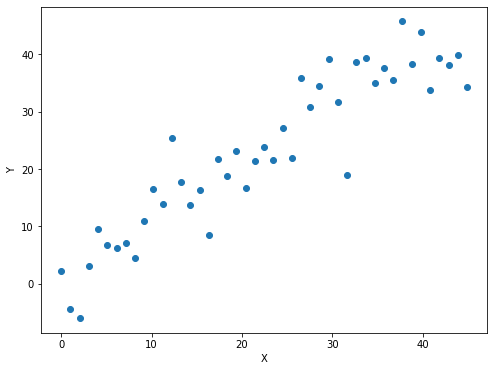

In [18]:
# 对训练数据进行可视化
import matplotlib.pyplot as plt
# 设定绘制窗口大小为8*6inch
plt.figure(figsize=(8,6))
# 绘制数据，由于x和y都是Variable，需要用data获取它们包裹的Tensor,并转成Numpy
plt.plot(x_train.data.numpy(),y_train.data.numpy(),'o')
# 设置X轴标签
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [19]:
# 定义两个自动微分变量a和b(a,b随机)
# a=Variable(torch.rand(1),requires_grad=True)  Variable已经被废弃
# b=Variable(torch.rand(1),requires_grad=True)
a=torch.rand(1,requires_grad=True)
b=torch.rand(1,requires_grad=True)
# 设置学习率
learning_rate=0.0001

In [20]:
# a和b的迭代计算
for i in range(500):
    predictions=a*x_train+b
    loss=torch.mean((predictions-y_train)**2)
    print('loss:',loss)
    loss.backward()
#add_    
    a.data.add_(-learning_rate*a.grad)
    b.data.add_(-learning_rate*b.grad)
# 在更新完a、b的数值后，需要清空a中的的梯度信息，
# 否则它会在下一步迭代的时候累加
    a.grad.zero_()
    b.grad.zero_()
    
print(a.data,b.data)

loss: tensor(253.9604, grad_fn=<MeanBackward0>)
loss: tensor(196.6316, grad_fn=<MeanBackward0>)
loss: tensor(153.8423, grad_fn=<MeanBackward0>)
loss: tensor(121.9050, grad_fn=<MeanBackward0>)
loss: tensor(98.0674, grad_fn=<MeanBackward0>)
loss: tensor(80.2753, grad_fn=<MeanBackward0>)
loss: tensor(66.9956, grad_fn=<MeanBackward0>)
loss: tensor(57.0837, grad_fn=<MeanBackward0>)
loss: tensor(49.6857, grad_fn=<MeanBackward0>)
loss: tensor(44.1639, grad_fn=<MeanBackward0>)
loss: tensor(40.0424, grad_fn=<MeanBackward0>)
loss: tensor(36.9662, grad_fn=<MeanBackward0>)
loss: tensor(34.6702, grad_fn=<MeanBackward0>)
loss: tensor(32.9565, grad_fn=<MeanBackward0>)
loss: tensor(31.6773, grad_fn=<MeanBackward0>)
loss: tensor(30.7226, grad_fn=<MeanBackward0>)
loss: tensor(30.0100, grad_fn=<MeanBackward0>)
loss: tensor(29.4781, grad_fn=<MeanBackward0>)
loss: tensor(29.0811, grad_fn=<MeanBackward0>)
loss: tensor(28.7847, grad_fn=<MeanBackward0>)
loss: tensor(28.5635, grad_fn=<MeanBackward0>)
loss: ten

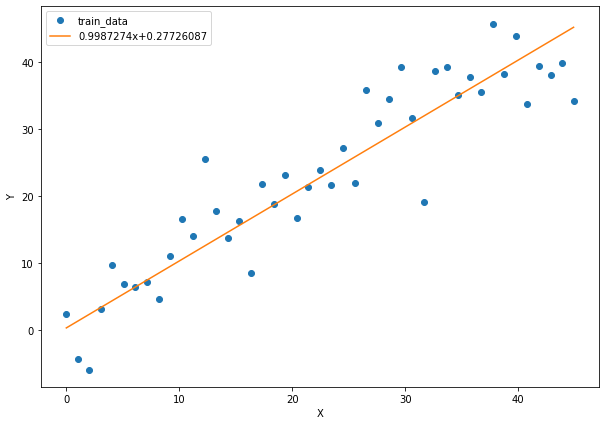

In [21]:
x_data=x_train.data.numpy()
y_data=y_train.data.numpy()
plt.figure(figsize=(10,7))
#绘制训练集散点
plt1, =plt.plot(x_data,y_data,'o')
# 绘制拟合直线
plt2, =plt.plot(x_data,a.data.numpy()*x_data+b.data.numpy())
# 坐标标注
plt.xlabel("X")
plt.ylabel("Y")
str1=str(a.data.numpy()[0])+'x+'+str(b.data.numpy()[0])
plt.legend([plt1,plt2],['train_data',str1])
plt.show()

In [22]:
predictions=a*x_test+b
predictions

tensor([46.1372, 47.1563, 48.1754, 49.1945, 50.2136], grad_fn=<AddBackward0>)

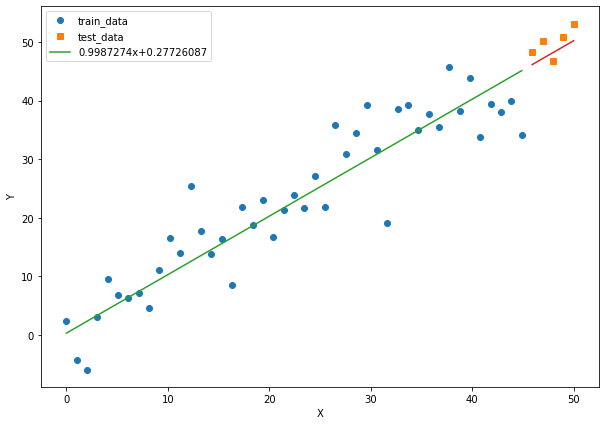

In [23]:
x_data=x_train.data.numpy()
y_data=y_train.data.numpy()
x_pred=x_test.data.numpy()
y_pred=y_test.data.numpy()
plt.figure(figsize=(10,7))
#绘制训练集散点
plt1, =plt.plot(x_data,y_data,'o')
plt2, =plt.plot(x_pred,y_pred,'s')
# 绘制拟合直线
plt3, =plt.plot(x_data,a.data.numpy()*x_data+b.data.numpy())
# 绘制预测数据
plt4, =plt.plot(x_pred,a.data.numpy()*x_pred+b.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
str1=str(a.data.numpy()[0])+'x+'+str(b.data.numpy()[0])
plt.legend([plt1,plt2,plt3],['train_data','test_data',str1])
plt.savefig("2-3.jpg")
plt.show()

In [24]:
#导入需要使用的库
import numpy as np
import pandas as pd #读取csv文件的库
import matplotlib.pyplot as plt
import torch
#from torch.autograd import Variable
import torch.optim as optim

# 让输出的图形直接在Notebook中显示
%matplotlib inline
data_path="hour.csv"
rides = pd.read_csv(data_path)
# head()读取5行数据并显示，查看数据格式
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


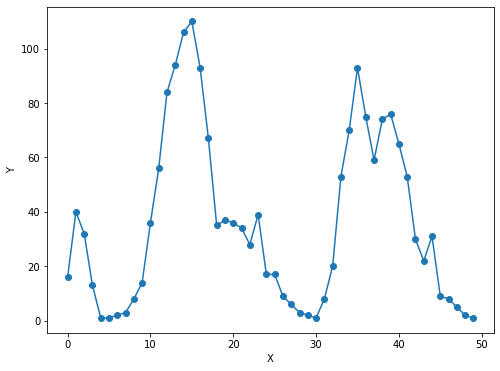

In [25]:
#我们取出最后一列的前50条记录来进行预测
counts = rides['cnt'][:50]

#获得变量x，它是1，2，……，50
x = np.arange(len(counts))

# 将counts转成预测变量（标签）：y
y = np.array(counts)

# 绘制一个图形，展示曲线长的样子
plt.figure(figsize = (8, 6)) #设定绘图窗口大小
plt.plot(x, y, 'o-') # 绘制原始数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
plt.savefig("3-2.jpg")
plt.show()

## 我们取出数据库的最后一列的前50条记录来进行预测
counts = rides['cnt'][:50]

# 创建变量x，它是1，2，……，50
x = torch.tensor(np.arange(len(counts)), dtype=torch.double, requires_grad = True)

# 将counts转成预测变量（标签）：y
y = torch.tensor(np.array(counts), dtype=torch.double, requires_grad = True)

a = torch.rand(1, dtype=torch.double, requires_grad = True) #创建a变量，并随机赋值初始化
b = torch.rand(1, dtype=torch.double, requires_grad = True) #创建b变量，并随机赋值初始化
print('Initial parameters:', [a, b])
learning_rate = 0.00001 #设置学习率
for i in range(10000):
    ### 增加了这部分代码，清空存储在变量a，b中的梯度信息，以免在backward的过程中会反复不停地累加
    predictions = a * x+ b  #计算在当前a、b条件下的模型预测数值
    loss = torch.mean((predictions - y) ** 2) #通过与标签数据y比较，计算误差
    print('loss:', loss)
    loss.backward() #对损失函数进行梯度反传
    a.data.add_(- learning_rate * a.grad)  #利用上一步计算中得到的a的梯度信息更新a中的data数值
    b.data.add_(- learning_rate * b.grad)  #利用上一步计算中得到的b的梯度信息更新b中的data数值
    a.grad.zero_() #清空a的梯度数值
    b.grad.zero_() #清空b的梯度数值

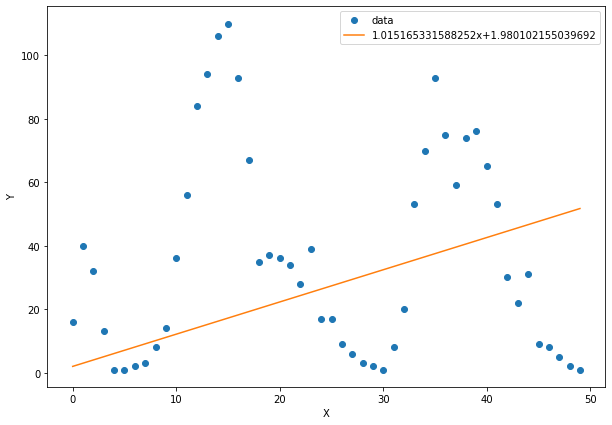

In [27]:
x_data=x.data.numpy()
y_data=y.data.numpy()
plt.figure(figsize=(10,7))
#绘制训练集散点
plt1, =plt.plot(x_data,y_data,'o')
# 绘制拟合直线
plt2, =plt.plot(x_data,a.data.numpy()*x_data+b.data.numpy())
# 坐标标注
plt.xlabel("X")
plt.ylabel("Y")
str1=str(a.data.numpy()[0])+'x+'+str(b.data.numpy()[0])
plt.legend([plt1,plt2],['data',str1])
plt.savefig("3-3.jpg")
plt.show()

In [28]:
#取出数据库中的最后一列的前50条记录来进行预测
counts = rides['cnt'][:50]

#创建变量x，它是1，2，……，50
x = torch.tensor(np.arange(len(counts), dtype = float)/len(counts), requires_grad = True)

# 将counts转成预测变量（标签）：y
y = torch.tensor(np.array(counts, dtype = float), requires_grad = True)

# 设置隐含层神经元的数量
sz = 10

# 初始化所有神经网络的权重（weights）和阈值（biases）
weights = torch.randn((1, sz), dtype = torch.double, requires_grad = True) #1*10的输入到隐含层的权重矩阵
biases = torch.randn(sz, dtype = torch.double, requires_grad = True) #尺度为10的隐含层节点偏置向量
weights2 = torch.randn((sz, 1), dtype = torch.double, requires_grad = True) #10*1的隐含到输出层权重矩阵

learning_rate = 0.001 #设置学习率
losses = []

# 将 x 转换为(50,1)的维度，以便与维度为(1,10)的weights矩阵相乘
x = x.view(50, -1)
# 将 y 转换为(50,1)的维度
y = y.view(50, -1)

for i in range(100000):
    # 从输入层到隐含层的计算
    hidden = x * weights + biases
    # 将sigmoid函数作用在隐含层的每一个神经元上
    hidden = torch.sigmoid(hidden)
    #print(hidden.size())
    # 隐含层输出到输出层，计算得到最终预测
    predictions = hidden.mm(weights2)
    #print(predictions.size())
    # 通过与标签数据y比较，计算均方误差
    loss = torch.mean((predictions - y) ** 2) 
    #print(loss.size())
    losses.append(loss.data.numpy())
    
    # 每隔10000个周期打印一下损失函数数值
    if i % 10000 == 0:
        print('loss:', loss)
        
    #对损失函数进行梯度反传
    loss.backward()
    
    #利用上一步计算中得到的weights，biases等梯度信息更新weights或biases中的data数值
    weights.data.add_(- learning_rate * weights.grad)  
    biases.data.add_(- learning_rate * biases.grad)
    weights2.data.add_(- learning_rate * weights2.grad)
    
    # 清空所有变量的梯度值。
    # 因为pytorch中backward一次梯度信息会自动累加到各个变量上，因此需要清空，否则下一次迭代会累加，造成很大的偏差
    weights.grad.zero_()
    biases.grad.zero_()
    weights2.grad.zero_()

loss: tensor(2363.5127, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(911.6831, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(603.5890, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(452.3378, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(243.1034, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(138.5938, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(99.0321, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(80.5025, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(71.6191, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(67.2532, dtype=torch.float64, grad_fn=<MeanBackward0>)


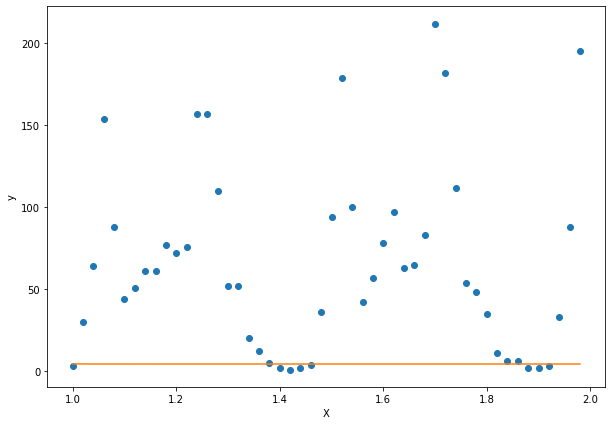

In [29]:
counts_predict = rides['cnt'][50:100] #读取待预测的接下来的50个数据点

#首先对接下来的50个数据点进行选取，注意x应该取51，52，……，100，然后再归一化
x = torch.tensor((np.arange(len(counts_predict), dtype = float) + len(counts) )/ len(counts_predict)
                 , requires_grad = True)
y=torch.tensor(np.array(counts_predict),dtype=torch.double,requires_grad=True)
x=x.view(len(x),-1)
hidden=x*weights+biases
# hidden = x.expand(sz, len(x)).t() * weights.expand(len(x), sz) + biases.expand(len(x), sz)
hidden=torch.sigmoid(hidden)
predictions=hidden.mm(weights2)
loss=torch.mean((y-predictions)**2)

x_data=x.data.numpy()
plt.figure(figsize=(10,7))
xplot, =plt.plot(x_data,y.data.numpy(),'o')
yplot, =plt.plot(x_data,predictions.data.numpy())
plt.xlabel("X")
plt.ylabel("y")
plt.savefig("3-8.jpg")
plt.show()

In [2]:
#导入需要使用的库
import numpy as np
import pandas as pd #读取csv文件的库
import matplotlib.pyplot as plt
import torch
#from torch.autograd import Variable
import torch.optim as optim

# 让输出的图形直接在Notebook中显示
%matplotlib inline
data_path="hour.csv"
rides = pd.read_csv(data_path)
# head()读取5行数据并显示，查看数据格式
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
#对于类型变量的特殊处理
# season=1,2,3,4, weathersi=1,2,3, mnth= 1,2,...,12, hr=0,1, ...,23, weekday=0,1,...,6
# 经过下面的处理后，将会多出若干特征，例如，对于season变量就会有 season_1, season_2, season_3, season_4
# 这四种不同的特征。
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    #利用pandas对象，我们可以很方便地将一个类型变量属性进行one-hot编码，变成多个属性
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

# 把原有的类型变量对应的特征去掉，将一些不相关的特征去掉
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# 调整所有的特征，标准化处理
quant_features = ['cnt', 'temp', 'hum', 'windspeed']
#quant_features = ['temp', 'hum', 'windspeed']

# 我们将每一个变量的均值和方差都存储到scaled_features变量中。
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [4]:
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,3,13,-0.956312,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,8,32,-0.823998,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,5,27,-0.868103,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,3,10,-0.972851,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,0,1,-1.039008,1,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# 将所有的数据集分为测试集和训练集，我们以后21天数据一共21*24个数据点作为测试集，其它是训练集
test_data = data[-21*24:]
train_data = data[:-21*24]
print('训练数据：',len(train_data),'测试数据：',len(test_data))

# 将我们的数据列分为特征列和目标列

#目标列
target_fields = ['cnt', 'casual', 'registered']
features, targets = train_data.drop(target_fields, axis=1), train_data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

# 将数据从pandas dataframe转换为numpy
X = features.values
Y = targets['cnt'].values
Y = Y.astype(float)
Y = Y.reshape([len(Y),1])

训练数据： 16875 测试数据： 504


In [14]:
features.head()

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [15]:
targets.head()

,cnt,casual,registered
0,-0.956312,3,13
1,-0.823998,8,32
2,-0.868103,5,27
3,-0.972851,3,10
4,-1.039008,0,1


In [29]:
# 定义神经网络架构，features.shape[1]个输入层单元，10个隐含层，1个输出层
input_size = features.shape[1] #输入层单元个数
hidden_size = 10 #隐含层单元个数
output_size = 1 #输出层单元个数
batch_size = 128 #每隔batch的记录数
weights1 = torch.randn([input_size, hidden_size], dtype = torch.double,  requires_grad = True) #第一到二层权重
biases1 = torch.randn([hidden_size], dtype = torch.double, requires_grad = True) #隐含层偏置
weights2 = torch.randn([hidden_size, output_size], dtype = torch.double, requires_grad = True) #隐含层到输出层权重
def neu(x):
    #计算隐含层输出
    #x为batch_size * input_size的矩阵，weights1为input_size*hidden_size矩阵，
    #biases为hidden_size向量，输出为batch_size * hidden_size矩阵    
    hidden = x.mm(weights1) + biases1.expand(x.size()[0], hidden_size)
#     hidden = x.mm(weights1) + biases1
    hidden = torch.sigmoid(hidden)
    
    #输入batch_size * hidden_size矩阵，mm上weights2, hidden_size*output_size矩阵，
    #输出batch_size*output_size矩阵
    output = hidden.mm(weights2)
    return output
def cost(x, y):
    # 计算损失函数
    error = torch.mean((x - y)**2)
    return error
def zero_grad():
    # 清空每个参数的梯度信息
    if weights1.grad is not None and biases1.grad is not None and weights2.grad is not None:
        weights1.grad.data.zero_()
        weights2.grad.data.zero_()
        biases1.grad.data.zero_()
def optimizer_step(learning_rate):
    # 梯度下降算法
    weights1.data.add_(- learning_rate * weights1.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    biases1.data.add_(- learning_rate * biases1.grad.data)

In [30]:
# 神经网络训练循环
losses = []
for i in range(1000):
    # 每128个样本点被划分为一个撮，在循环的时候一批一批地读取
    batch_loss = []
    # start和end分别是提取一个batch数据的起始和终止下标
    for start in range(0, len(X), batch_size):
        end = start + batch_size if start + batch_size < len(X) else len(X)
        xx = torch.tensor(X[start:end], dtype = torch.double, requires_grad = True)
        yy = torch.tensor(Y[start:end], dtype = torch.double, requires_grad = True)
        predict = neu(xx)
        loss = cost(predict, yy)
#        清空梯度信息
        zero_grad()
        loss.backward()
        optimizer_step(0.01)
#        每128个数据放入1次损失值
        batch_loss.append(loss.data.numpy())
    
    # 每隔100步输出一下损失值（loss）
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

0 1.514882684852729
100 0.42701201006051037
200 0.3044470566574781
300 0.2720214676721372
400 0.22513794895592656
500 0.17573117569383323
600 0.14296025654659292
700 0.12283445850216879
800 0.11130114613291286
900 0.10445191922372368


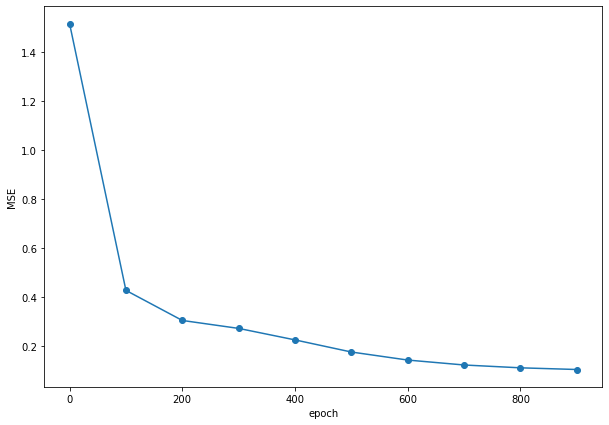

In [32]:
# 打印输出损失值
fig = plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(losses))*100,losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.savefig("3-9.jpg")

In [5]:
# 定义神经网络架构，features.shape[1]个输入层单元，10个隐含层，1个输出层
input_size = features.shape[1]
hidden_size = 10
output_size = 1
batch_size = 128
neu = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size),
)
# MSE均方误差
cost = torch.nn.MSELoss()
# # pytorch自己会准备参数，直接使用neu.parameters就行
optimizer = torch.optim.SGD(neu.parameters(), lr = 0.01)

In [6]:
# 神经网络训练循环
losses = []
for i in range(1000):
    # 每128个样本点被划分为一个撮，在循环的时候一批一批地读取
    batch_loss = []
    # start和end分别是提取一个batch数据的起始和终止下标
    for start in range(0, len(X), batch_size):
        end = start + batch_size if start + batch_size < len(X) else len(X)
        xx = torch.tensor(X[start:end], dtype = torch.float, requires_grad = True)
        yy = torch.tensor(Y[start:end], dtype = torch.float, requires_grad = True)
        predict = neu(xx)
        loss = cost(predict, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.data.numpy())
    
    # 每隔100步输出一下损失值（loss）
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

0 0.92481107
100 0.27496645
200 0.24412924
300 0.1814862
400 0.11572643
500 0.085717596
600 0.07560285
700 0.07065099
800 0.067410715
900 0.06508677


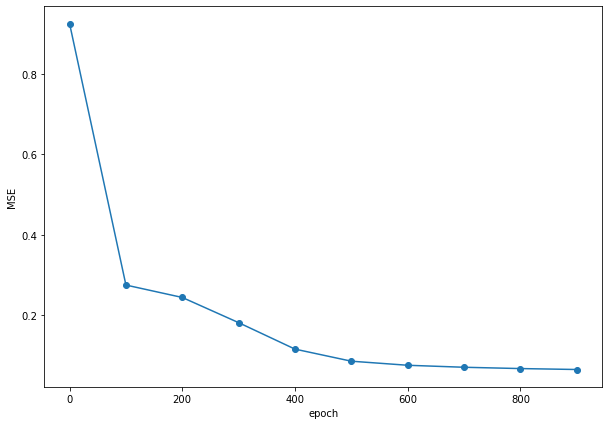

In [7]:
# 打印输出损失值
fig = plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(losses))*100,losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('MSE')
fig.savefig("3-10.jpg")

16875    Dec 10
16876    Dec 10
16877    Dec 11
16878    Dec 11
16879    Dec 11
          ...  
17374    Dec 31
17375    Dec 31
17376    Dec 31
17377    Dec 31
17378    Dec 31
Name: dteday, Length: 504, dtype: object
16887    Dec 11
16911    Dec 12
16935    Dec 13
16959    Dec 14
16983    Dec 15
17007    Dec 16
17031    Dec 17
17055    Dec 18
17079    Dec 19
17103    Dec 20
17127    Dec 21
17151    Dec 22
17175    Dec 23
17199    Dec 24
17223    Dec 25
17247    Dec 26
17271    Dec 27
17295    Dec 28
17319    Dec 29
17343    Dec 30
17367    Dec 31
Name: dteday, dtype: object


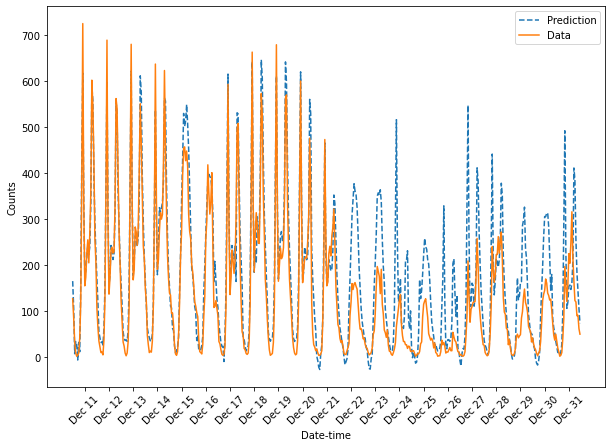

In [8]:
# 用训练好的神经网络在测试集上进行预测
targets = test_targets['cnt'] #读取测试集的cnt数值
targets = targets.values.reshape([len(targets),1]) #将数据转换成合适的tensor形式
targets = targets.astype(float) #保证数据为实数

# 将属性和预测变量包裹在Variable型变量中
x = torch.tensor(test_features.values, dtype = torch.float, requires_grad = True)
y = torch.tensor(targets, dtype = torch.float, requires_grad = True)

# 用神经网络进行预测
predict = neu(x)
predict = predict.data.numpy()


# 将后21天的预测数据与真实数据画在一起并比较
# 横坐标轴是不同的日期，纵坐标轴是预测或者真实数据的值

#形成1个子图，子图个数为1，添加子图大小参数figsize 
fig, ax= plt.subplots(figsize = (10, 7))

mean, std = scaled_features['cnt']
# 显示的时候恢复成未标准化前数据
ax.plot(predict * std + mean, label='Prediction', linestyle = '--')
ax.plot(targets * std + mean, label='Data', linestyle = '-')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')
# 对横坐标轴进行标注
dates = pd.to_datetime(rides.loc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
# print(np.arange(len(dates)))
# print(np.arange(len(dates))[12::24])
ax.set_xticks(np.arange(len(dates))[12::24])
ax.set_xticklabels(dates[12::24], rotation=45)
print(dates)
print(dates[12::24])
fig.savefig("3-10.jpg")

[Text(12, 0, 'Dec 22'), Text(36, 0, 'Dec 23'), Text(60, 0, 'Dec 24')]

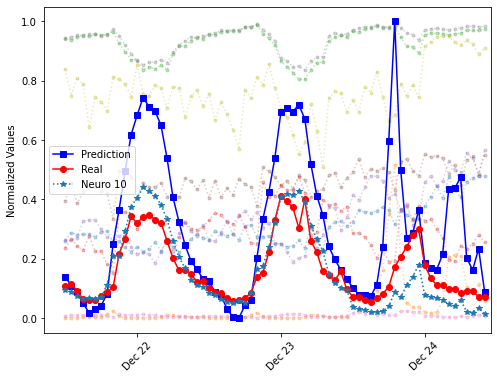

In [21]:
# 选出三天预测不准的日期：Dec 22，23，24
# 将这三天的数据聚集到一起，存入subset和subtargets中
bool1 = rides['dteday'] == '2012-12-22'
bool2 = rides['dteday'] == '2012-12-23'
bool3 = rides['dteday'] == '2012-12-24'

# 将三个布尔型数组求与
bools = [any(tup) for tup in zip(bool1,bool2,bool3) ]
# 将相应的变量取出来
subset = test_features.loc[rides[bools].index]
subtargets = test_targets.loc[rides[bools].index]
subtargets = subtargets['cnt']
subtargets = subtargets.values.reshape([len(subtargets),1])

def feature(X, net):
    # 定义了一个函数可以提取网络的权重信息，所有的网络参数信息全部存储在了neu的named_parameters集合中了
    X = torch.tensor(X, dtype = torch.float, requires_grad = False)
    dic = dict(net.named_parameters()) #提取出来这个集合
    weights = dic['0.weight'] #可以按照层数.名称来索引集合中的相应参数值
    biases = dic['0.bias'] #可以按照层数.名称来索引集合中的相应参数值
    h = torch.sigmoid(X.mm(weights.t()) + biases.expand([len(X), len(biases)])) # 隐含层的计算过程
    return h # 输出层的计算

# 将这几天的数据输入到神经网络中，读取出隐含层神经元的激活数值，存入results中
results = feature(subset.values, neu).data.numpy()
# 这些数据对应的预测值（输出层）
predict = neu(torch.tensor(subset.values, dtype = torch.float, requires_grad = True)).data.numpy()

#将预测值还原成原始数据的数值范围
mean, std = scaled_features['cnt']
predict = predict * std + mean
subtargets = subtargets * std + mean
# 将所有的神经元激活水平画在同一张图上，蓝色的是模型预测的数值
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(results[:,:],'.:',alpha = 0.3)
ax.plot((predict - min(predict)) / (max(predict) - min(predict)),'bs-',label='Prediction')
ax.plot((subtargets - min(predict)) / (max(predict) - min(predict)),'ro-',label='Real')
ax.plot(results[:, 9],':*',alpha=1, label='Neuro 10')

ax.set_xlim(right=len(predict))
ax.legend()
plt.ylabel('Normalized Values')

dates = pd.to_datetime(rides.loc[subset.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
ax.set_xticklabels(dates[12::24], rotation=45)
fig.savefig("")

In [51]:
for para in neu.named_parameters():
    print(para) 

('0.weight', Parameter containing:
tensor([[-2.1517e-01, -4.0614e-02, -1.0516e-01,  5.4308e-02, -1.1437e-01,
         -6.2382e-02,  7.6552e-02,  5.8724e-02,  1.6933e-01,  6.4778e-02,
         -1.0376e-03,  1.1390e-01,  5.9447e-02,  1.9477e-02,  9.5131e-02,
          7.1202e-03, -3.4932e-03,  1.8305e-02,  1.5940e-01, -3.6335e-02,
         -9.0728e-02, -5.4818e-03,  1.8764e-02, -1.2173e-01, -1.5531e-01,
          2.9141e-02,  1.1026e-01,  6.3001e-03, -5.6181e-02, -2.1444e-03,
          2.0125e-02,  3.7873e-03, -9.8517e-02, -2.6571e-02,  2.8248e-01,
         -1.0817e-02,  3.3487e-02,  2.3034e-01,  8.3346e-02,  1.3844e-01,
          7.7592e-02,  1.2086e-01, -1.8834e-01, -1.1458e-01, -9.3430e-02,
         -1.1976e-01, -1.1405e-01,  6.5605e-04, -3.8784e-02, -4.9509e-02,
          8.3201e-02,  1.4002e-02,  8.9738e-02, -1.0683e-01,  9.2824e-02,
         -9.4244e-02],
        [-4.5748e-02, -5.6792e-02,  3.4704e-03, -8.0855e-02,  8.0398e-03,
         -8.4377e-02, -7.2572e-02,  1.2197e-01, -1.284

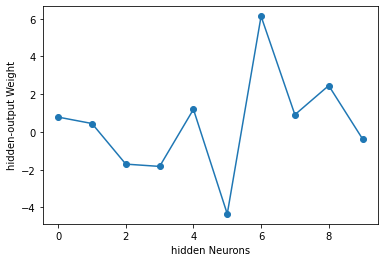

In [63]:
# 找到了与峰值响应的神经元，把它到输入层的权重输出出来
dic = dict(neu.named_parameters())
weights = dic['2.weight']
# 因为weights.data.numpy()是1*1*10的矩阵，取[0]变成1*10的矩阵
fig=plt.figure()
plt.plot(weights.data.numpy()[0],'o-')
plt.xlabel('hidden Neurons')
plt.ylabel('hidden-output Weight')
fig.savefig("3-13.jpg")

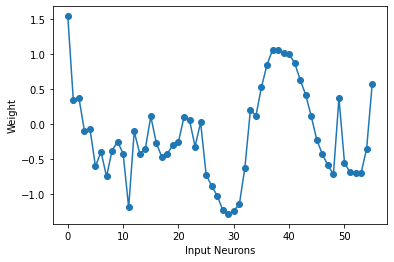

In [23]:
# 找到了与峰值相应的神经元，把它到输入层的权重输出出来
dic = dict(neu.named_parameters())
weights = dic['0.weight'][9]
fig=plt.figure()
plt.plot(weights.data.numpy(),'o-')
plt.xlabel('Input Neurons')
plt.ylabel('Weight')
fig.savefig("3-14.jpg")

In [22]:
# 列出所有的features中的数据列，找到对应的编号
for (i, c) in zip(range(len(features.columns)), features.columns):
    print(i,c)

0 yr
1 holiday
2 temp
3 hum
4 windspeed
5 season_1
6 season_2
7 season_3
8 season_4
9 weathersit_1
10 weathersit_2
11 weathersit_3
12 weathersit_4
13 mnth_1
14 mnth_2
15 mnth_3
16 mnth_4
17 mnth_5
18 mnth_6
19 mnth_7
20 mnth_8
21 mnth_9
22 mnth_10
23 mnth_11
24 mnth_12
25 hr_0
26 hr_1
27 hr_2
28 hr_3
29 hr_4
30 hr_5
31 hr_6
32 hr_7
33 hr_8
34 hr_9
35 hr_10
36 hr_11
37 hr_12
38 hr_13
39 hr_14
40 hr_15
41 hr_16
42 hr_17
43 hr_18
44 hr_19
45 hr_20
46 hr_21
47 hr_22
48 hr_23
49 weekday_0
50 weekday_1
51 weekday_2
52 weekday_3
53 weekday_4
54 weekday_5
55 weekday_6


[Text(12, 0, 'Dec 22'), Text(36, 0, 'Dec 23'), Text(60, 0, 'Dec 24')]

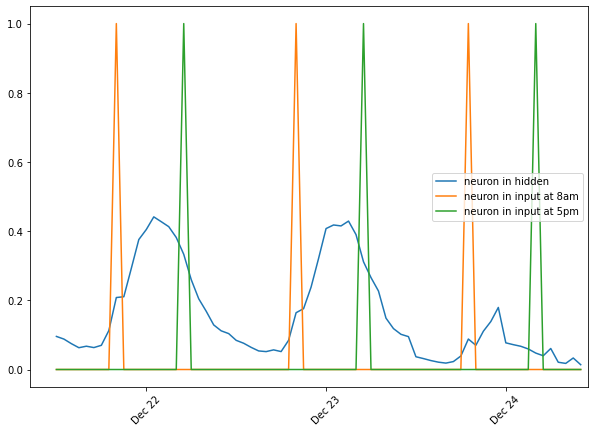

In [26]:
# 显示在不同日期，指定的第7个隐含层神经元细胞的激活值，以及输入层响应
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(results[:,9],label='neuron in hidden')
ax.plot(subset.values[:,33],label='neuron in input at 8am')
ax.plot(subset.values[:,42],label='neuron in input at 5pm')
ax.set_xlim(right=len(predict))
ax.legend()

dates = pd.to_datetime(rides.loc[subset.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
ax.set_xticklabels(dates[12::24], rotation=45)

In [16]:
# 重新构造用于分类的人工神经网络Neuc

input_size = features.shape[1]
hidden_size = 10
output_size = 2
batch_size = 128
neuc = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size),
    torch.nn.Sigmoid(),
)
# 将损失函数定义为交叉熵
# 为什么不采用均方误差，主要原因是逻辑回归配合MSE损失函数时
# 采用梯度下降法进行学习时，会出现模型一开始训练时，学习速率非常慢的情况（MSE损失函数）。
cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(neuc.parameters(), lr = 0.1)

In [17]:
# Y是训练数据cnt列
Y_labels = Y > np.mean(Y)
Y_labels = Y_labels.astype(int)
Y_labels = Y_labels.reshape(-1)
Y_labels

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
# 定义一个专门计算分类错误率的函数，它的基本思想是，对于预测向量predictions的每一行，
# 取最大的那个元素的下标，与标签labels中的元素做比较
def error_rate(predictions, labels):
    """计算预测错误率的函数，其中predictions是模型给出的一组预测结果，labels是数据之中的正确答案"""
    predictions = np.argmax(predictions, 1)
    return 100.0 - (100.0 * np.sum( predictions == labels) / predictions.shape[0])

# 神经网络训练循环
losses = []
errors = []
for i in range(4000):
    # 每128个样本点被划分为一个撮
    batch_loss = []
    batch_errors = []
    for start, end in zip(range(0, len(X), batch_size), range(batch_size, len(X)+1, batch_size)):
        xx = torch.tensor(X[start:end], dtype = torch.float, requires_grad = True)
        yy = torch.tensor(Y_labels[start:end], dtype = torch.long)
        predict = neuc(xx)
        loss = cost(predict, yy)
        err = error_rate(predict.data.numpy(), yy.data.numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.data.numpy())
        batch_errors.append(err)
    
    # 每隔100步输出一下损失值（loss）
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        errors.append(np.mean(batch_errors))
        print(i, np.mean(batch_loss), np.mean(batch_errors))

0 0.67895323 41.19155534351145
100 0.4432484 12.750477099236642
200 0.43353826 12.213740458015268
300 0.42870235 11.838024809160306
400 0.41688758 10.239742366412214
500 0.4048622 8.778625954198473
600 0.39466304 7.615696564885496
700 0.38711914 6.882156488549619
800 0.3819186 6.309637404580153
900 0.3783126 5.898139312977099
1000 0.3756589 5.689408396946565
1100 0.373587 5.516459923664122
1200 0.3719284 5.337547709923665
1300 0.37057498 5.194417938931298
1400 0.36945093 5.093034351145038
1500 0.36849403 5.01550572519084
1600 0.36765516 4.9856870229007635
1700 0.36690468 4.9439408396946565
1800 0.36622706 4.890267175572519
1900 0.3656102 4.818702290076335
2000 0.36504015 4.747137404580153
2100 0.36450353 4.675572519083969
2200 0.363987 4.639790076335878
2300 0.36347347 4.58611641221374
2400 0.36297363 4.538406488549619
2500 0.36251283 4.550333969465649
2600 0.36208788 4.490696564885496
2700 0.36169383 4.413167938931298
2800 0.36132643 4.383349236641221
2900 0.3609817 4.341603053435114


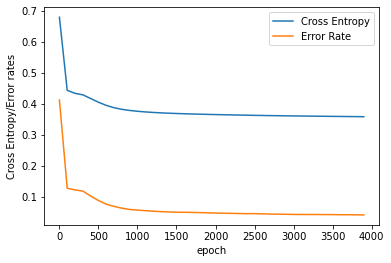

In [21]:
# 打印输出交叉熵损失值和错误率
fig=plt.figure()
plt.plot(np.arange(len(losses))*100,losses, label = 'Cross Entropy')
plt.plot(np.arange(len(losses))*100, np.array(errors) / float(100), label = 'Error Rate')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy/Error rates')
plt.legend()
plt.savefig("3-15.jpg")

error_rate  12.301587301587304


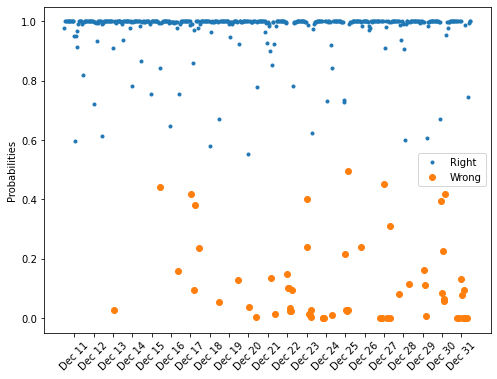

In [37]:
# 读取测试数据
targets = test_targets['cnt']
targets = targets.values.reshape(-1, 1)
Y_labels = targets > np.mean(Y)
Y_labels = Y_labels.astype(int)
Y_labels = Y_labels.reshape(-1)
x = torch.tensor(test_features.values, dtype = torch.float, requires_grad = True)

# 打印神经网络预测的错误率
predict = neuc(x)
print("error_rate ",error_rate(predict.data.numpy(), Y_labels))

# 接下来，我们把预测正确的数据和错误的数据分别画出来，纵坐标分别是预测正确的概率和预测错误的概率
prob = predict.data.numpy()
# rights 预测正确的行号为true，预测错误的行号为false，返回一个true ，false的列表
rights = np.argmax(prob, 1) == Y_labels
wrongs = np.argmax(prob, 1) != Y_labels
# 将rights中为true的行号代入，并返回标签
right_labels = Y_labels[rights]
wrong_labels = Y_labels[wrongs]
probs = prob[rights, :]
probs1 = prob[wrongs, :]
# rightness最大的输出值预测正确，最大输出值的所形成的list
rightness = [probs[i, right_labels[i]] for i in range(len(right_labels))]
# right_index是targets中预测正确的下标
right_index = np.arange(len(targets))[rights]
# wrongness最大的输出值预测错误，最大输出值的所形成的list
wrongness = [probs1[i, wrong_labels[i]] for i in range(len(wrong_labels))]
# wrong_index是targets中预测正确的下标
wrong_index = np.arange(len(targets))[wrongs]
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(right_index, rightness, '.', label='Right')
ax.plot(wrong_index, wrongness,'o',label='Wrong')

ax.legend()
plt.ylabel('Probabilities')

dates = pd.to_datetime(rides.loc[test_features.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
ax.set_xticklabels(dates[12::24], rotation=45)
fig.savefig("3-16.jpg")